# ЯМА

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Функция, выдающая гамильтониан для плоской ямы:

In [15]:
def p(n): 
    h= 2/n
    buf = np.zeros((n, n))
    flat = buf.ravel()
    flat[0::n+1] = -2/h**2
    flat[n::n+1] = 1/h**2
    flat[1::n+1] = 1/h**2
    return buf

Это U - наш горб.  $U = \frac{h}{cosh(x)^2}-\frac{h}{cosh(a)^2}$. а = 1.

In [16]:
def U(p, h):
    n = p.shape[0]
    delta = 1/(np.cosh(1))**2
    u = np.array([h*(1/(np.cosh(2 * i / n))**2 - delta) for i in range(n)])

    return p + np.diag(u)


Строим графики собственных значений и их разницы. Если h = 0, то видим, что графики совпадают.

In [17]:
%matplotlib notebook
from ipywidgets import interact, widgets
def H(n,h):
    x = np.linspace(1,n,n)
    P_0 = p(n)
    E_0 = np.sort(np.linalg.eig(P_0)[0])
    E_u = np.sort(np.linalg.eig(U(P_0, h))[0])
    return x, E_0, E_u


def f(n,h):

    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(H(n,h)[0], H(n,h)[1], color = 'green', label = '$E_0$')
    ax.plot(H(n,h)[0], H(n,h)[2], color = 'red', label = '$E_1$')
    plt.legend()
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(H(n,h)[0], np.abs(H(n,h)[1] - H(n,h)[2]), color = 'black')
    
    
interact(f, n = widgets.IntSlider(min=0,max=1000,step=1,value=500), h = widgets.IntSlider(min=-100,max=100,step=1,value=0));
plt.show()

interactive(children=(IntSlider(value=500, description='n', max=1000), IntSlider(value=0, description='h', min…

<IPython.core.display.Javascript object>


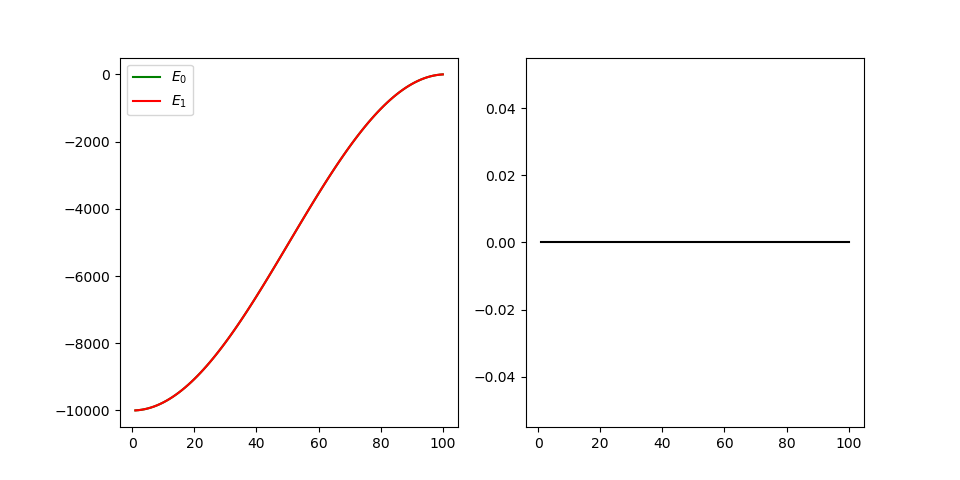

In [31]:
f(100, 0)

<IPython.core.display.Javascript object>


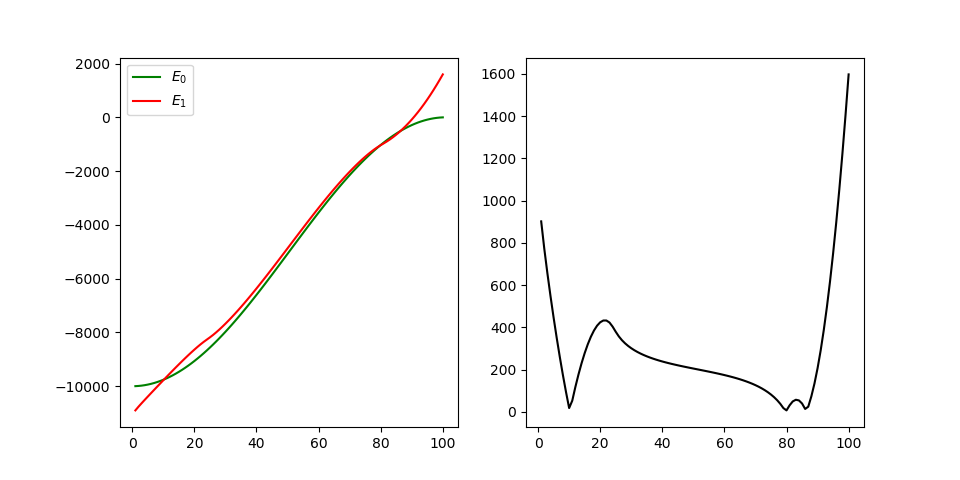

In [23]:
f(100,3000)

<IPython.core.display.Javascript object>


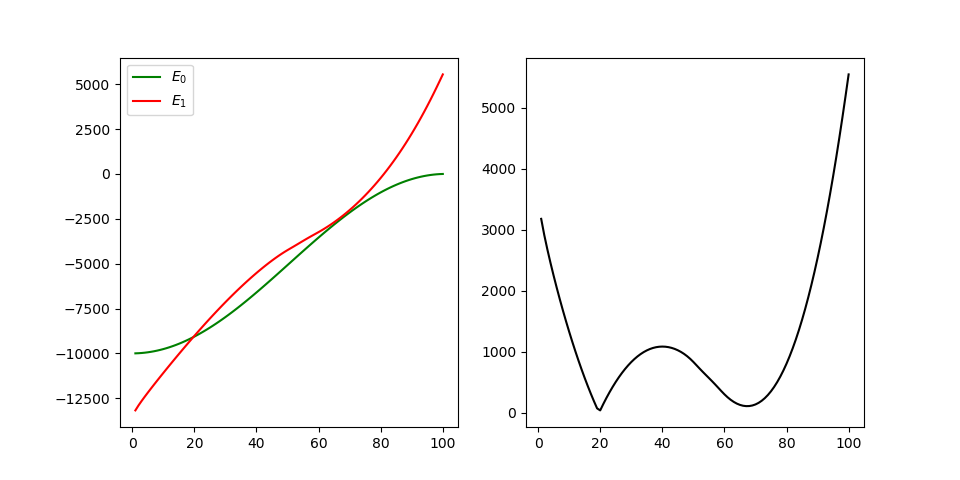

In [30]:
f(100, 10000)